## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo V - Redes neurais auto-associativas e geradoras</span>


### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

### Questão 1)

Qual a **diferença** entre um Autoencoder convencional (AE) e um Variational Autoencoder (VAE)?

(a) VAE aprende uma representação latente com base na comparação entre exemplos reais e exemplos gerados artificialmente, enquanto que o AE aprende apenas a partir de dados reais<br>
<font color='red'>(b) O espaço latente do VAE é composto por parâmetros de distribuições a partir dos quais são amostrados o exemplos a serem decodificados pelo elemento decoder, enquanto que o espaço latente do AE é aprendido sem assumir distribuições para suas dimensões.</font><br>
(c) O espaço latente do AE é composto por parâmetros de distribuições a partir dos quais são amostrados o exemplos a serem decodificados pelo elemento decoder, enquanto que o espaço latente do VAE é aprendido sem assumir distribuições para suas dimensões, permitindo que esse seja usado também como modelo gerador.<br>
(d) VAE aprende apenas a partir de dados reais, enquanto o AE aprende com base na comparação entre exemplos reais na entrada e exemplos gerados artificialmente em sua saída<br>

Autoencoders convencionais tentam codificar atributos de forma discreta.<br>
EX: Sorriso 0.95, Cor da pele 0.82...

Autoencoders variacionais aprendem distribuições (seus parâmetros) de cada variável, a partir do qual se amostram valores.<br>
EX: Sorriso, Cor da pele podem assumir variados valores, a partir da função de distribuição.

---
### Questão 2)


Considere os métodos Generative Adversarial Networks, Denoising Autoencoder e Variational Autoencoder. Podemos dizer que esses métodos se enquadram em qual tipo de paradigma aprendizado?

 (a) Supervisionado<br>
 (b) Semi-supervisionado<br>
<font color='red'> (c) Não supervisionado</font><br>
 (d) Fracamente supervisionado<br>

---
### Questão 3)

O objetivo principal no aprendizado de uma rede do tipo Generative Adversarial Network é

<font color='red'> (a) Aprender as operações que permitem, a partir de um exemplo aleatório amostrado de uma determinada distribuição, gerar um exemplo que se assemelhe a uma amostra obtida da distribuição dos dados de treinamento</font><br>
 (b) Classificar exemplos fornecidos para a rede neural em exemplos advindos do conjunto de treinamento da base de dados de interesse, e exemplos que não pertençam a esse conjunto.<br>
 (c) Realizar uma regressão da distribuição de entrada para um espaço latente compacto e de menor dimensionalidade que a entrada, a partir do qual podemos reconstruir um exemplo de forma fiel com relação à sua dimensionalidade original<br>
 (d) Obter um modelo que aprenda a distribuição dos dados de entrada e que projete esses dados num espaço que seja robusto a possíveis ruídos em dados futuros, permitindo assim evitar ataques adversariais.<br>

GANs (Generative Adversarial Networks = Redes adversárias geradoras)

Adversária pois há dois componentes que "disputam"

Geradora pois o objetivo central é aprender a gerar dados

---

### Questão 4)

Carregue a base de dados `wine.csv`, conforme abaixo, com uma divisão hold-out utilizando os 80% exemplos iniciais para treinamento e os restantes para teste. Utilizaremos normalização min-max 0-1. Utilizaremos apenas os exemplos de treinamento obtidos nessa separação.

Projete um Autoencoder para produzir um espaço de características com 5 dimensões, com as seguintes camadas:
* Entrada (com as dimensões da base de dados)
* Dropout de 0.25
* Camada densa de 5 neurônios (camada de código) e ativação relu
* Camada densa de saída (com as dimensões da base de dados) e ativação sigmoide

Código é o nome que se dá à camada latente do Autoencoder, geralmente aquela contendo a maior restrição de dimensionalidade, que fornece um espaço de características compacto para os dados de entrada. Também chamamos de código as características obtidas a partir dessa camada.

Inicialize as sementes `seed(1)` e `set_seed(2)` antes de instanciar o modelo, compilar e treinar.

Utilize a função de custo mean absolute error (mse), otimizador Adam com taxa 0.0001, batchsize 10 e treine por 300 épocas.

Após o treinamento, obtenha as características a partir da camada "código" do Autoencoder e grafe um scatterplot das duas primeiras características do código de treinamento, analisando visualmente a distribuição desses dados com relação das classes. Podemos identificar qual distribuição dos dados em termos da separação e sobreposição de classes?

<font color='red'>(a) classe mais distintamente separada: 1, classes sobrepostas: 0 e 2</font><br>
(b) classe mais distintamente separada: 0, classes sobrepostas: 1 e 2 <br>
(c) classes mais distintamente separadas: 0, 1 e 2, classes sobrepostas: nenhuma<br>
(d) classe mais distintamente separada: 2, classes sobrepostas: 0 e 1 <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("wine.csv")
df.dropna(inplace=True)
print(df.head())
classif = np.array(df['Class'].astype("category").cat.codes)
features = np.array(df.iloc[:, :-1])
print(features.shape)

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline Class  
0            

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, classif, test_size=0.20, random_state=0)
print("Exemplos de treinamento:", len(X_train))
print("Exemplos de teste:", len(X_test))

scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

Exemplos de treinamento: 142
Exemplos de teste: 36


Projete um Autoencoder para produzir um espaço de características com 5 dimensões, com as seguintes camadas:<br>

Entrada (com as dimensões da base de dados)<br>
Dropout de 0.25<br>
Camada densa de 5 neurônios (camada de código) e ativação relu<br>
Camada densa de saída (com as dimensões da base de dados) e ativação sigmoide<br>

Código é o nome que se dá à camada latente do Autoencoder, geralmente aquela contendo a maior restrição de dimensionalidade, que fornece um espaço de características compacto para os dados de entrada. Também chamamos de código as características obtidas a partir dessa camada.

In [4]:
input_dim=X_train_n.shape[1]
input_dim

13

In [5]:
code_dim=5

In [6]:
### projetar autoencoder
def autoencoder_architecture(input_dim, code_dim):
    
    input_data = keras.layers.Input(shape=(input_dim,))
    x = keras.layers.Dropout(0.25)(input_data)
    y = keras.layers.Dense(code_dim, activation='relu', name='code')(x)
    z = keras.layers.Dense(input_dim, activation='sigmoid')(y)
    output = keras.models.Model(input_data, z)
    
    return output

Inicialize as sementes `seed(1)` e `set_seed(2)` antes de instanciar o modelo, compilar e treinar.

Utilize a função de custo mean absolute error (mse), otimizador Adam com taxa 0.0001, batchsize 10 e treine por 300 épocas.

In [7]:
### definir sementes, instanciar AE, compilar e treinar
epochs = 300
batch_size = 10

seed(1)
set_seed(2)

# instanciar AE
autoencoder = autoencoder_architecture(input_dim=X_train_n.shape[1], code_dim=code_dim)
autoencoder.summary()

# compilar AE
autoencoder.compile(loss='mse',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001))

# treinar AE
hist_ae = autoencoder.fit(X_train_n, X_train_n, batch_size=batch_size, epochs=epochs)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dropout (Dropout)            (None, 13)                0         
_________________________________________________________________
code (Dense)                 (None, 5)                 70        
_________________________________________________________________
dense (Dense)                (None, 13)                78        
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
15/15 [==============================] - 1s 2ms/step - loss: 0.0815
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0816
Epoch 3/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0827
Epoch 4/300
15/15 [==

15/15 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 92/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 93/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 94/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 95/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 96/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 97/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 98/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0541
Epoch 99/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 100/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 101/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0535
Epoch 102/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 103/300
15/15 [=================

15/15 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 191/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 192/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0457
Epoch 193/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0466
Epoch 194/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0455
Epoch 195/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0458
Epoch 196/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0455
Epoch 197/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 198/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0463
Epoch 199/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 200/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 201/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 202/300
15/15 [=========

15/15 [==============================] - 0s 577us/step - loss: 0.0415
Epoch 289/300
15/15 [==============================] - 0s 815us/step - loss: 0.0401
Epoch 290/300
15/15 [==============================] - 0s 508us/step - loss: 0.0393
Epoch 291/300
15/15 [==============================] - 0s 320us/step - loss: 0.0400
Epoch 292/300
15/15 [==============================] - 0s 541us/step - loss: 0.0395
Epoch 293/300
15/15 [==============================] - 0s 769us/step - loss: 0.0396
Epoch 294/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 295/300
15/15 [==============================] - 0s 382us/step - loss: 0.0395
Epoch 296/300
15/15 [==============================] - 0s 261us/step - loss: 0.0415
Epoch 297/300
15/15 [==============================] - 0s 442us/step - loss: 0.0402
Epoch 298/300
15/15 [==============================] - 0s 495us/step - loss: 0.0399
Epoch 299/300
15/15 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 300/

In [8]:
### obter características dos dados de treinamento (code_train) a partir da camada de código do autoencoder
code_modelenc = keras.models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('code').output)
code_train = np.asarray(code_modelenc.predict(X_train_n))


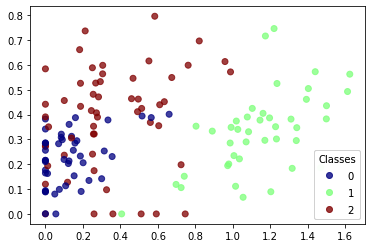

In [9]:
### Exibir as duas primeiras caracerísticas para análise visual
size_sample = len(X_train)
fig, ax = plt.subplots()
scatter = ax.scatter(code_train[:size_sample,0], code_train[:size_sample,1], c=y_train[:size_sample], alpha=0.75, cmap="jet")
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend1);

---

### Questão 5)


Carregue a base de dados `wine.csv`, conforme abaixo, com uma divisão hold-out utilizando os 80% exemplos iniciais para treinamento e os restantes para teste. 

Projete um Autoencoder profundo para produzir uma projeção em 3 dimensões, com as seguintes camadas:
* Entrada (com as dimensões originais da base de dados)
* Camada densas com 8 neurônios, ativação relu
* Camada densa com 3 neurônios (camada de código), ativação relu
* Dropout de 1/3.0 (um terço)
* Camada densas com 8 neurônios, ativação relu
* Camada densa de saída (com as dimensões originais da base de dados), ativação sigmóide

Inicialize as sementes `seed(1)` e `set_seed(2)` antes de instanciar o modelo, compilar e treinar (com o conjunto de treinamento).

Utilize a função de custo mean squared error (MSE), otimizador Adam com taxa 0.0001, batchsize 10 e treine por 300 épocas.

Após o treinamento:
1. Calcule o MSE (do autoencoder) no conjunto de teste
2. Obtenha as características a partir do código de 3 dimensões para o conjunto de treinamento e de teste. Treine um classificador SVM (utilizando `SVC(C=0.5, random_state=1, kernel="rbf")`) com o código de treinamento (3 dimensões). Calcule a acurácia obtida pelo SVM no conjunto de teste (utilizando as características obtidas a partir do autoencoder).

Os valores observados de MSE no teste do autoencoder, e acurácia de classificação SVM no teste estão em qual intervalo?

(a) MSE =[0.01, 0.08]; Acurácia = [0.73, 0.82] <br>
<font color='red'>(b) MSE =[0.01, 0.08]; Acurácia = [0.87, 0.98] </font><br>
(c) MSE =[0.10, 0.16]; Acurácia = [0.73, 0.82] <br>
(d) MSE =[0.10, 0.16]; Acurácia = [0.87, 0.98] <br>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, classif, test_size=0.20, random_state=0)
print("Exemplos de treinamento:", len(X_train))
print("Exemplos de teste:", len(X_test))

scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

Exemplos de treinamento: 142
Exemplos de teste: 36


Projete um Autoencoder profundo para produzir uma projeção em 3 dimensões, com as seguintes camadas:
* Entrada (com as dimensões originais da base de dados)
* Camada densas com 8 neurônios, ativação relu
* Camada densa com 3 neurônios (camada de código), ativação relu
* Dropout de 1/3.0 (um terço)
* Camada densas com 8 neurônios, ativação relu
* Camada densa de saída (com as dimensões originais da base de dados), ativação sigmóide

In [11]:
print(input_dim)
print(code_dim)

13
5


In [12]:
### projetar autoencoder
def deep_autoencoder(input_dim, code_dim):
    
    input_data = keras.layers.Input(shape=(input_dim,))
    den1 = keras.layers.Dense(8, activation='relu')(input_data)
    den2 = keras.layers.Dense(3, activation='relu', name='code')(den1)
    drop = keras.layers.Dropout(1/3.0)(den2)
    den3 = keras.layers.Dense(8, activation='relu')(drop)
    den4 = keras.layers.Dense(input_dim, activation='sigmoid')(den3)
    output = keras.models.Model(input_data, den4)
    
    return output

Inicialize as sementes `seed(1)` e `set_seed(2)` antes de instanciar o modelo, compilar e treinar (com o conjunto de treinamento).

Utilize a função de custo mean squared error (MSE), otimizador Adam com taxa 0.0001, batchsize 10 e treine por 300 épocas.

In [13]:
### definir sementes, instanciar AE, compilar e treinar
epochs = 300
batch_size = 10

seed(1)
set_seed(2)

# instanciar AE
autoencoder = deep_autoencoder(input_dim=X_train_n.shape[1], code_dim=code_dim)
autoencoder.summary()

# compilar AE
autoencoder.compile(loss='mse',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001))

# treinar AE
hist_ae = autoencoder.fit(X_train_n, X_train_n, validation_data=(X_test_n,X_test_n), batch_size=batch_size, epochs=epochs)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
code (Dense)                 (None, 3)                 27        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 13)                117       
Total params: 288
Trainable params: 288
Non-trainable params: 0
_____________________________________________________________

15/15 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0529
Epoch 72/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0528
Epoch 73/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.0527
Epoch 74/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0526
Epoch 75/300
15/15 [==============================] - ETA: 0s - loss: 0.048 - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0525
Epoch 76/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0524
Epoch 77/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0523
Epoch 78/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0522
Epoch 79/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.0521
Epoch 80/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0510 - val_lo

15/15 [==============================] - 0s 5ms/step - loss: 0.0453 - val_loss: 0.0458
Epoch 153/300
15/15 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.0457
Epoch 154/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0438 - val_loss: 0.0457
Epoch 155/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0446 - val_loss: 0.0456
Epoch 156/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0440 - val_loss: 0.0455
Epoch 157/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0451 - val_loss: 0.0454
Epoch 158/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0452 - val_loss: 0.0453
Epoch 159/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0444 - val_loss: 0.0452
Epoch 160/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0447 - val_loss: 0.0452
Epoch 161/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0447 - val_loss: 0.0451
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.0399 - val_loss: 0.0387
Epoch 234/300
15/15 [==============================] - 0s 6ms/step - loss: 0.0404 - val_loss: 0.0386
Epoch 235/300
15/15 [==============================] - 0s 8ms/step - loss: 0.0407 - val_loss: 0.0385
Epoch 236/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0399 - val_loss: 0.0385
Epoch 237/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0394 - val_loss: 0.0384
Epoch 238/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0407 - val_loss: 0.0383
Epoch 239/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0397 - val_loss: 0.0382
Epoch 240/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0394 - val_loss: 0.0381
Epoch 241/300
15/15 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0381
Epoch 242/300
15/15 [==============================] - 0s 5ms/step - loss: 0.0391 - val_loss: 0.0380
Epoc

Após o treinamento:
1. Calcule o MSE (do autoencoder) no conjunto de teste
2. Obtenha as características a partir do código de 3 dimensões para o conjunto de treinamento e de teste. Treine um classificador SVM (utilizando `SVC(C=0.5, random_state=1, kernel="rbf")`) com o código de treinamento (3 dimensões). Calcule a acurácia obtida pelo SVM no conjunto de teste (utilizando as características obtidas a partir do autoencoder).

In [17]:
# Obtendo o MSE médio para o conjunto de treino no treinamento
MSE_treino = np.mean(hist_ae.history['loss'])
print('MSE_treino no treinamento: %.2f ' % (MSE_treino))

MSE_treino no treinamento: 0.05 


In [18]:
# Obtendo o MSE médio para o conjunto de teste no treinamento
MSE_teste = np.mean(hist_ae.history['val_loss'])
print('MSE_teste no treinamento: %.2f ' % (MSE_teste))

MSE_teste no treinamento: 0.05 


In [19]:
# Obtendo o MSE para o conjunto de teste após o treinamento
score = autoencoder.evaluate(X_test_n,X_test_n, verbose=0)
print('MSE_teste após o treinamento: %.2f ' % (score))

MSE_teste após o treinamento: 0.03 


Calculando score...

score: 0.94 


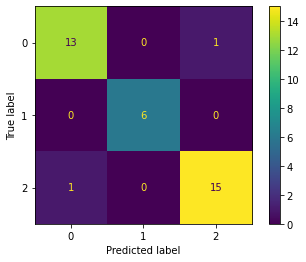

In [20]:
### obter características dos dados de treinamento (code_train) a partir da camada de código do autoencoder
code_modelenc = keras.models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('code').output)
code_train = np.asarray(code_modelenc.predict(X_train_n))

from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

clf = svm.SVC(C=0.5, random_state=1, kernel="rbf")
clf.fit(code_train, y_train)
code_test = np.asarray(code_modelenc.predict(X_test_n))

# Score: Return the mean accuracy on the given test data and labels.
print('Calculando score...')
score = clf.score(code_test, y_test)
print('\nscore: %.2f ' % (score))

disp = plot_confusion_matrix(clf, code_test, y_test)